In [1]:
import numpy as np
import pandas as pd
from scipy import io
from skmultilearn import problem_transform
import skmultilearn.model_selection
from sklearn import model_selection, svm, preprocessing,   ensemble, naive_bayes, neighbors, tree, metrics
import matplotlib.pyplot as plt

In [2]:
# load data

data = io.loadmat('../data/CHD_49.mat')
x = data['data']
y = data['targets']

# transform labels to {0,1}

y = preprocessing.Binarizer().fit_transform(y)

# split data

x, y, k, l = skmultilearn.model_selection.iterative_train_test_split(x, y, test_size = 0.25)

# scale data

scaler = preprocessing.MinMaxScaler()
scaler = scaler.fit(x)
x = scaler.transform(x)
k = scaler.transform(k)

In [3]:
parameters_6_classifiers = [{
  'classifier': [
    ensemble.RandomForestClassifier(),
    naive_bayes.MultinomialNB(),
    neighbors.KNeighborsClassifier(),
    svm.LinearSVC(),
    svm.SVC(),
    tree.DecisionTreeClassifier()
  ],
},]

parameters_svc = [{
  'classifier': [svm.SVC()],
  'classifier__C': np.logspace(-4, 4, 9),
  'classifier__gamma' :  np.logspace(-4, 4, 9)
}]

In [4]:
def foo(model, params):
    model = model_selection.GridSearchCV(
      model,
      params,
      scoring={
          'accuracy': 'accuracy',
          'f1_macro': 'f1_macro',
          'f1_micro': 'f1_micro',
          'hamming_score': metrics.make_scorer(metrics.hamming_loss)
      },
      refit='accuracy',
      return_train_score=True
    )


    model.fit(x, y)
    print (model.best_params_, model.best_score_)
    print(pd.DataFrame(model.cv_results_))
    return model

In [5]:
metric_names = ['accuracy', 'f1_micro', 'f1_macro', 'hamming_score']

In [6]:
def bar(model):
    l_star = model.predict(k)
    result = {}
    result['accuracy'] = [metrics.accuracy_score(l, l_star)]
    result['f1_micro'] = [metrics.f1_score(l, l_star, average='micro')]
    result['f1_macro'] = [metrics.f1_score(l, l_star, average='macro')]
    result['hamming_score'] = [metrics.hamming_loss(l, l_star)]
    return result

In [7]:
def get_best_result(model):
    return pd.DataFrame(model.cv_results_).iloc[model.best_index_]

In [8]:
def get_metrics(result):
    res = {}
    for i in metric_names:
        res[i] = [result['mean_test_'+str(i)]]
    return res

In [9]:
# set - metric plot (4)
# model - metric plot (4)
# parameter - metric (4)

In [10]:
models = {}
results = {}

In [11]:
model = foo(problem_transform.BinaryRelevance(), parameters_6_classifiers)

/home/steve/v3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1465: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/steve/v3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1465: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/steve/v3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1465: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/steve/v3/lib/python3.6/site-packages/sklearn/svm/

{'classifier': RandomForestClassifier()} 0.13073758448427858
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.810058      0.028630         0.068781        0.006872   
1       0.010553      0.008821         0.006895        0.000462   
2       0.012623      0.008379         0.036900        0.001722   
3       0.087339      0.007820         0.007268        0.000206   
4       0.045421      0.001223         0.015566        0.001054   
5       0.011434      0.000200         0.007148        0.000607   

           param_classifier                                    params  \
0  RandomForestClassifier()  {'classifier': RandomForestClassifier()}   
1           MultinomialNB()           {'classifier': MultinomialNB()}   
2    KNeighborsClassifier()    {'classifier': KNeighborsClassifier()}   
3               LinearSVC()               {'classifier': LinearSVC()}   
4                     SVC()                     {'classifier': SVC()}   
5  DecisionTreeClassifier()  {'

In [12]:
models['br_6c'] = model

result = model.cv_results_
results['br_6c'] = result

result = pd.DataFrame(result)

<AxesSubplot:xlabel='param_classifier'>

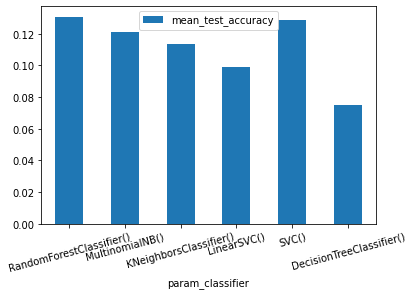

In [13]:
result.plot.bar(x='param_classifier', y='mean_test_accuracy', rot=15)

<AxesSubplot:xlabel='param_classifier'>

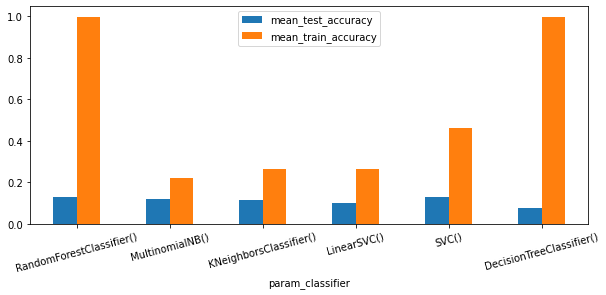

In [14]:
plt.rcParams['figure.figsize'] = [10, 4]
result.filter(regex='^mean_(test|train)_accuracy$|param_classifier').plot.bar(x='param_classifier', subplots=False, rot=15)

In [15]:
pd.DataFrame(bar(model))

,accuracy,f1_micro,f1_macro,hamming_score
0,0.15493,0.641562,0.45644,0.301643


<AxesSubplot:xlabel='set'>

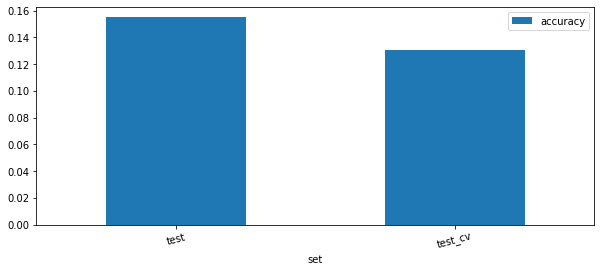

In [16]:
ab = pd.concat([pd.DataFrame(bar(model)), pd.DataFrame(get_metrics(get_best_result(model)))])
ab['set'] = ['test', 'test_cv']
ab.plot.bar(x='set', y='accuracy', rot=15)

In [17]:
model = foo(problem_transform.ClassifierChain(), parameters_6_classifiers)

/home/steve/v3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1465: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/steve/v3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1465: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/steve/v3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1465: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/steve/v3/lib/python3.6/site-packages/sklearn/svm/

{'classifier': SVC()} 0.14769321187187773
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.837372      0.009588         0.063626        0.001663   
1       0.006898      0.000179         0.008201        0.000376   
2       0.010737      0.000871         0.038210        0.000804   
3       0.075782      0.005937         0.008769        0.000353   
4       0.046715      0.001806         0.017138        0.000736   
5       0.012506      0.000988         0.008609        0.000225   

           param_classifier                                    params  \
0  RandomForestClassifier()  {'classifier': RandomForestClassifier()}   
1           MultinomialNB()           {'classifier': MultinomialNB()}   
2    KNeighborsClassifier()    {'classifier': KNeighborsClassifier()}   
3               LinearSVC()               {'classifier': LinearSVC()}   
4                     SVC()                     {'classifier': SVC()}   
5  DecisionTreeClassifier()  {'classifier': Decisi

In [18]:
models['cc_6c'] = model

result = model.cv_results_
results ['cc_6c']= result
result = pd.DataFrame(result)

<AxesSubplot:xlabel='param_classifier'>

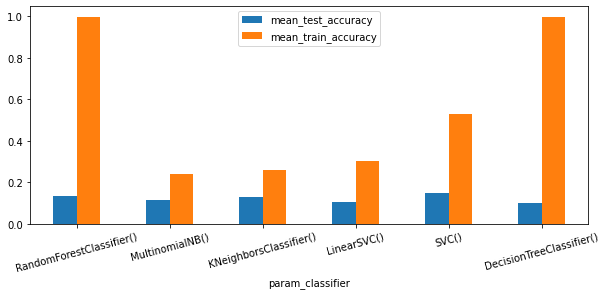

In [19]:
result.filter(regex='^mean_(test|train)_accuracy$|param_classifier').plot.bar(x='param_classifier', subplots=False, rot=15)

<AxesSubplot:xlabel='param_classifier'>

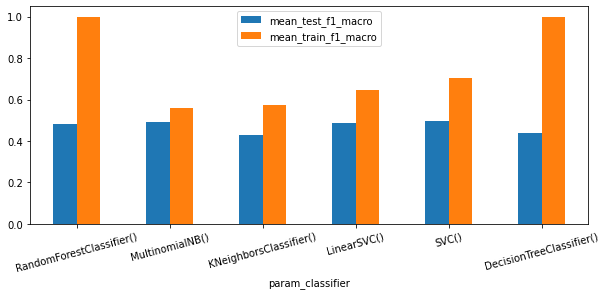

In [20]:
result.filter(regex='^mean_(test|train)_f1_macro$|param_classifier').plot.bar(x='param_classifier', subplots=False, rot=15)

<AxesSubplot:xlabel='param_classifier'>

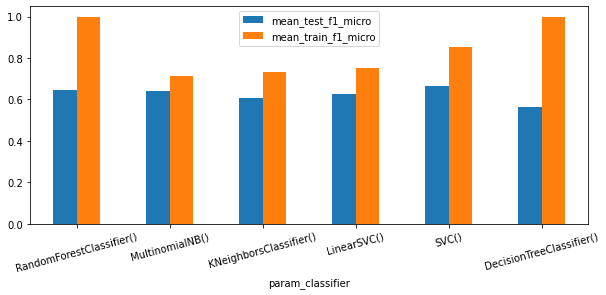

In [21]:
result.filter(regex='^mean_(test|train)_f1_micro$|param_classifier').plot.bar(x='param_classifier', subplots=False, rot=15)

<AxesSubplot:xlabel='param_classifier'>

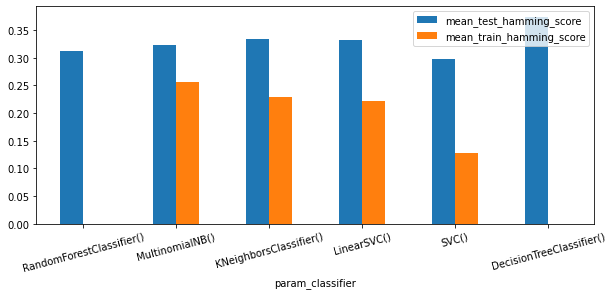

In [22]:
result.filter(regex='^mean_(test|train)_hamming_score$|param_classifier').plot.bar(x='param_classifier', subplots=False, rot=15)

In [23]:
model = foo(problem_transform.LabelPowerset(), parameters_6_classifiers)

/home/steve/v3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1465: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/steve/v3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1465: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/steve/v3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1465: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/steve/v3/lib/python3.6/site-packages/sklearn/svm/

{'classifier': RandomForestClassifier()} 0.14534234498971493
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.157164      0.003135         0.025907        0.005249   
1       0.006179      0.006246         0.013657        0.001933   
2       0.002955      0.000115         0.018020        0.000639   
3       0.073896      0.006122         0.012861        0.000288   
4       0.029292      0.000628         0.015523        0.000434   
5       0.004534      0.000186         0.011813        0.000167   

           param_classifier                                    params  \
0  RandomForestClassifier()  {'classifier': RandomForestClassifier()}   
1           MultinomialNB()           {'classifier': MultinomialNB()}   
2    KNeighborsClassifier()    {'classifier': KNeighborsClassifier()}   
3               LinearSVC()               {'classifier': LinearSVC()}   
4                     SVC()                     {'classifier': SVC()}   
5  DecisionTreeClassifier()  {'

In [24]:
models['lp_6c'] = model

result = model.cv_results_
results['lp_6c'] = result

In [25]:
model = foo(problem_transform.BinaryRelevance(), parameters_svc)

/home/steve/v3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1465: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/steve/v3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1465: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/steve/v3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1465: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/steve/v3/lib/python3.6/site-packages/sklearn/metr

/home/steve/v3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1465: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/steve/v3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1465: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/steve/v3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1465: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/steve/v3/lib/python3.6/site-packages/sklearn/metr

/home/steve/v3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1465: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/steve/v3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1465: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/steve/v3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1465: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/steve/v3/lib/python3.6/site-packages/sklearn/metr

{'classifier': SVC(C=10.0, gamma=0.01), 'classifier__C': 10.0, 'classifier__gamma': 0.01} 0.13076697032030563
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.033258      0.002248         0.013115        0.000319   
1        0.032708      0.001339         0.012983        0.000663   
2        0.032603      0.001345         0.013657        0.000342   
3        0.032981      0.000590         0.013463        0.000395   
4        0.032986      0.001377         0.013417        0.000250   
..            ...           ...              ...             ...   
76       0.056504      0.000730         0.017121        0.000345   
77       0.056287      0.000537         0.017132        0.000360   
78       0.073154      0.000758         0.020970        0.000219   
79       0.073342      0.001607         0.020303        0.000565   
80       0.072599      0.000708         0.020114        0.000288   

           param_classifier param_classifier__C param_classifier__gamma  

/home/steve/v3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1465: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


In [26]:
models['br_svc'] = model

result = model.cv_results_
results['br_svc'] = result

result = pd.DataFrame(result)

best_column = result.iloc[model.best_index_]
print(best_column)

mean_fit_time                               0.0403718
std_fit_time                              0.000957863
mean_score_time                              0.013515
std_score_time                            0.000507946
param_classifier              SVC(C=10.0, gamma=0.01)
                                       ...           
split2_train_hamming_score                   0.204545
split3_train_hamming_score                   0.216012
split4_train_hamming_score                   0.200403
mean_train_hamming_score                     0.206111
std_train_hamming_score                    0.00604243
Name: 47, Length: 68, dtype: object


<AxesSubplot:xlabel='classifier'>

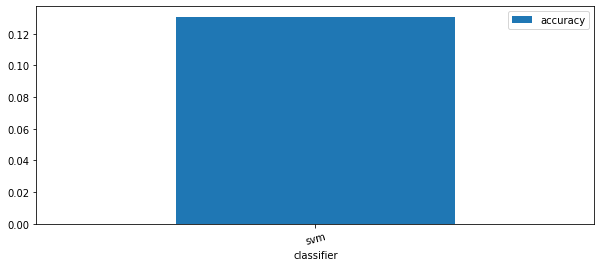

In [27]:
data = {
    'classifier': ['svm'],
    'accuracy': best_column['mean_test_accuracy']
}
pd.DataFrame(data).plot.bar(x='classifier', rot=15)

<AxesSubplot:xlabel='classifier'>

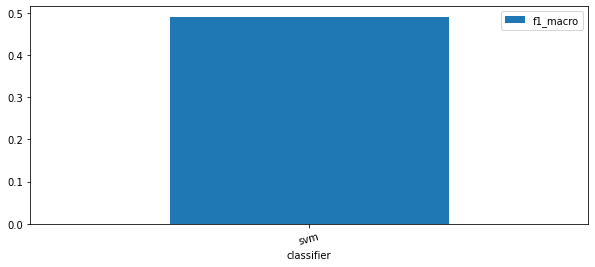

In [28]:
data = {
    'classifier': ['svm'],
    'f1_macro': best_column['mean_test_f1_macro']
}
pd.DataFrame(data).plot.bar(x='classifier', rot=15)

<AxesSubplot:xlabel='param_classifier'>

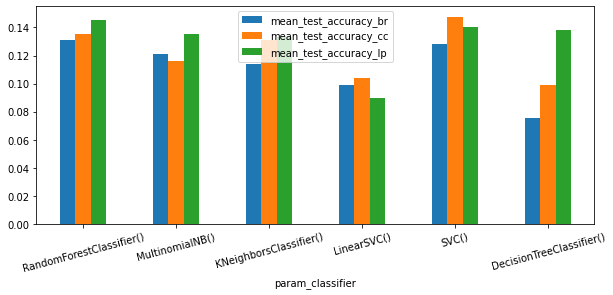

In [29]:
d = pd.DataFrame()
d['param_classifier'] = results['br_6c']['param_classifier']
d['mean_test_accuracy_br'] = results['br_6c']['mean_test_accuracy']
d['mean_test_accuracy_cc'] = results['cc_6c']['mean_test_accuracy']
d['mean_test_accuracy_lp'] = results['lp_6c']['mean_test_accuracy']
d.plot.bar(x='param_classifier', rot=15)